## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `TEST.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Read in the dataset and take a look at the top few rows here:
df=pd.read_csv('TEST.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#Find the number of rows in the dataset
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#find The number of unique users in the datase
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
#faind The proportion of users converted
(df.converted==1).mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#The number of times the `new_page` and `treatment` don't line up
((df.group=='treatment') & (df.landing_page=='old_page')).sum()+ ((df.group=='control') & (df.landing_page=='new_page')).sum()

3893

f. Do any of the rows have missing values?

In [7]:
#faind missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


we didn't have  any missing values in any row

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df['misaligned']=((df.group=='treatment') & (df.landing_page=='old_page')) | ((df.group=='control') & (df.landing_page=='new_page'))

df2=df.query('misaligned==False')
df2

,user_id,timestamp,group,landing_page,converted,misaligned
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,False
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,False
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,False
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,False
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,False


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]
df2

,user_id,timestamp,group,landing_page,converted,misaligned
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,False
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,False
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,False
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,False
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,False


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2['user_id'].value_counts().sort_values(ascending=False).head()

773192    2
639032    1
663620    1
778364    1
645179    1
Name: user_id, dtype: int64

**we faind one row** 

c. What is the row information for the repeat **user_id**? 

In [12]:
df2.query('user_id==773129')

,user_id,timestamp,group,landing_page,converted,misaligned
92983,773129,2017-01-14 16:32:00.028137,control,old_page,0,False


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:

df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted,misaligned
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,False


In [14]:
df2.shape

(290584, 6)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
(df2['converted']==1).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
actual_pold=(df2.query('group=="control"')['converted']==1).mean()
actual_pold

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# probability they convert
actual_pnew=(df2.query('group=="treatment"')['converted']==1).mean()
actual_pnew

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
(df2['landing_page']=='new_page').mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Looking at the results we find**

**The probability that the customer will convert any page is 0.11
The probability that the client was in the treatment group, the probability that they will be transferred is 0.12
The probability that the customer was in the control group the probability that they will be transferred is 0.11
the probability that an individual received the new page is 0.5**

**Relying on the results shown in front of us, the difference between the control group and the treatment group is very small. We cannot rely on these results, as we still need more statistical analysis to reach the correct probability.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null is H0: p_new - p_old <= 0** 

**Alternative hypothese is H1: p_new - p_old > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new_null=(df2['converted']==1).mean()
p_new_null


0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
pold_null=(df2['converted']==1).mean()
pold_null

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
num_new=(df2['landing_page']=='new_page').sum()
num_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
num_old=(df2['landing_page']=='old_page').sum()
num_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted=np.random.binomial(num_new, pold_null)
new_page_converted

17478

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted=np.random.binomial(num_old, pold_null)
old_page_converted

17307

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
df=new_page_converted/num_new-old_page_converted/num_old
df

0.0011472795679552394

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
p_diffs=[]
p_diffs = np.random.binomial(num_new, pold_null, 10000)/num_new - np.random.binomial(num_old, pold_null, 10000)/num_old 
p_diffs

array([  4.62996155e-05,  -9.24208491e-04,  -5.11603423e-04, ...,
         5.34581035e-04,   8.78695147e-04,   2.73229760e-04])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0,0.5,'counts')

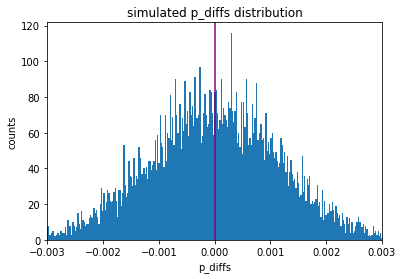

In [27]:
plt.hist(p_diffs, bins=400)
plt.xlim(-0.003, 0.003)
plt.xlabel('p_diffs')
plt.ylabel('counts')
plt.title('simulated p_diffs distribution')
plt.axvline(0.000, color='purple');
plt.ylabel('counts')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:

var1 = df2[df2['landing_page'] == 'new_page']
var1=var1['converted'].mean()
var2 = df2[df2['landing_page'] == 'old_page']
var2 = var2['converted'].mean()
actual_diff = var1-var2
count = 0
for i in p_diffs:
    if i> actual_diff:
        count = count+1
        
print (count/(len(p_diffs)))

0.9063


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value is called the p-value.When we look at it, we know that What we calculated in part j is less than the p.  p-value is above 0.05, which means we do not have evidence to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm
convert_old = (df2.query('landing_page=="old_page"')['converted']==1).sum()
convert_new = (df2.query('landing_page=="new_page"')['converted']==1).sum()
num_old = (df2['landing_page']=='old_page').sum()
num_new=(df2['landing_page']=='new_page').sum()
convert_old, convert_new, num_old, num_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [num_new, num_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**PWe noticed here that the z-score of 1.3 data could not exceed or reach the critical value1.9, making the null hypothesis that users of the old page have a conversion rate better or equal to the users of the old page is failed, and this means that the conversion rate of the new page and the old page are close. This result is the same as the result that appeared in J. and K. result.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We need to use logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2['intercept'] = 1
df2[['a_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('a_page', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,misaligned,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [33]:


log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results= log_mod.fit()



Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-05 19:34 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.190.**

**We have shown in this part that null=new page is not better than old page, alternative=new page is better**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Perhaps it is good to know that adding other factors will be better at predicting the response if other factors are taken into account. For example, if we add days of the week, time, or even cities, it will help us get more information. .**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
countries = pd.read_csv('countries.csv')
S=countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
S.head()


,country,timestamp,group,landing_page,converted,misaligned,intercept,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,False,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,False,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,False,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,False,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,False,1,1


In [36]:
S[['CA','US','UK']] = pd.get_dummies(S['country'])
S.head()

,country,timestamp,group,landing_page,converted,misaligned,intercept,ab_page,CA,US,UK
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,False,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,False,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,False,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,False,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,False,1,1,0,1,0


In [37]:
lm=sm.Logit(S['converted'], S[['intercept', 'UK','US']])
results=lm.fit()
results.summary2()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-05 19:34 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
US             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

In [38]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-05 19:34 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
US             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
S['CA_ab_page'] = S['CA']*S['ab_page']
S['UK_ab_page'] = S['UK']*S['ab_page']
logit_mod = sm.Logit(S['converted'], S[['intercept','CA','UK','ab_page' ,'CA_ab_page', 'UK_ab_page']])
results = logit_mod.fit()
results.summary2()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-05 19:34 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
UK            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
CA_ab_page   -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
UK_ab_page   -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
==================================================================

"""


**Based on the above, one p-value does present as statistically significant: the interaction of CA and ab_page (p = 0.16; p < 0.05)and the interaction ofUK and ab_page (p = 0.23; p < 0.05).**

In [40]:
np.exp(results.params)

intercept     0.136392
CA            0.988285
UK            1.005761
ab_page       1.010893
CA_ab_page    0.924703
UK_ab_page    0.969090
dtype: float64

In [41]:
1/np.exp(results.params)

intercept     7.331806
CA            1.011854
UK            0.994272
ab_page       0.989224
CA_ab_page    1.081428
UK_ab_page    1.031896
dtype: float64

<a id='conclusions'></a>


## Conclusions##

**I am analyzed user conversion rate vs. their landing_pages. Both A/B testing and logistic regression were employed to answer the question.**

**(1) In A/B testing, I tested a one-sided hypothesis in order to know new page leads to more conversion rate. The null is new page is not better than old page. The alternative  that is a new page is better. The resulted p value from my test is 0.90, therefore I failed to reject null, It was concluded that the new page is not considered better than the old one.** 


**(2)In the logistic regression methodWe did not find any difference between  between the conversion rate of old and new page and   In view of the second theory,  the p value from my test is close to 0.2, therefore I failed to reject null Therefore, we see that there is no difference  in conversion rate between old and new landing_page**

**(3)Looking at the tests that we have done, we see that the results that appeared to us are similar, as there were no results that distinguished them from the old page.**

**(4)Taking this point into consideration, I suggest that the new page should be dispensed with and the old one should be satisfied, or search for better features to develop the new page.**


In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

255